# _Python for Scientific Data Analysis_

# SciPy

## Section 3: Statistics

_“There are three kinds of lies: Lies, Damned Lies, and Statistics”_

  Mark Twain (or was it Benjamin Disraeli?)

The ``scipy.stats`` subpackage contains different a large number of functions dedicated to the latter: frequentists statistics, probability, distributions, correlation, functions, different statistical tests, etc.   Want to generate a distribution with a known functional form?  this subpackage has it?  Is one distribution different than another?  How different? This subpackage has it. 

 In previous generations, a lot of these topics were covered in the venerable "Numerical Recipes" textbook (er, phonebook) for code in C and FORTRAN.   Your instructor and his advisor (and his advisor before him, most likely) learned numerical techniques from this source.   We are no longer in the dark ages of dial-up Internet and cellphones the size of books, but this text (written *before* such an era) IS the authority on this topic, in my opinion.  And the value of that text to highlight what is important even in Python remains.  
 
 Therefore, some of my discussion will basically look like a "_Numerical Recipes in SciPy_" (someone should write this textbook).
 
 The key topics we want to cover are as follows:
 
 * _Statistical Properties of Data_ - You have some data, how do you describe it?
 * _Distributions of Data_ - You have some data, how is the data-as-an-aggregate intelligible?  What patterns do it fit into?
 * _Statistical Tests of Data_ - You have some data, how sure are you that it differs from some other data, how sure are you that something you think is interesting is actually significant vs noise, etc.

 Similar to before, our key start-up commands are to import relevant libraries: numpy, matplotlib, and the stats subpackage of SciPy:
 

In [58]:
 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import scipy

#and because this is a Jupyter notebook
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=[8,6]

### Properties of Data

We have some data.  How would you describe it?   Well, let's then start with some data:

In [59]:
A = np.array([[10, 14, 11, 7, 9.5], [8, 9, 17, 14.5, 12],
              [15, 7, 11.5, 10, 10.5], [11, 11, 9, 12, 14]])
              
print(A.shape) #this is a (4,5) array

(4, 5)


#### _Basic Properties_

Key properties of the data include the mean, median, standard deviation, and variance.  

* mean -- The mean of an array is $\Sigma_{i} A_{i} /N$, where $N$ is the number of elements of $A$.    Note, that if you call the program without any axis keyword, then the mean is calculated over the entire array.  Whereas the axis keyword specifies that the mean is calculated over a specific dimension.  E.g. ``mean=scipy.stats.mean(A,axis=1)``.

* median -- the median of an array $x$ of length $n$ equals  $x_{(n+1)/2}$ if $n$ is odd and $0.5\times(x_{n/2} + x_{(n/2)+1} )$ if $n$ is even.   

* variance -- By "variance" here we usually mean the "average of the squared deviations from the mean": $S^{2}$ = $\Sigma_{i} (x_{i}-\bar{x})^{2}$/$N$, where $N$ equals the total population size.   This is also known as the _population variance_.     There is also the _sample variance_, where $S^{2}$ = $\Sigma_{i} (x_{i}-\bar{x})^{2}$/($n-1$) for $n$ samples.   

 The best way to think about the latter is that we are picking out a sample of $n$ from the larger population of $N$.   As such, we have an additional correction factor (the "Bessell correction", which is responsible for the $n-1$ in the denominator.   You can also think of this as a "degree of freedom": i.e. you estimate the variance from a random sample of $n$ independent measurements, so the dof equals $n$ minus the number of parameters estimated (i.e. the sample mean).

* standard deviation -- The standard deviation of a random variable, $\sigma$, is equal to the square root of its variance.  e.g. for a population standard deviation, 
 $\sigma$ = $\sqrt{\Sigma_{i} (x_{i}-\bar{x})^{2}/N}$.   Similarly, the sample standard deviation includes a $n-1$ factor in the denomintor, not $N$:
 $\sigma$ = $\sqrt{\Sigma_{i} (x_{i}-\bar{x})^{2}/(n-1)}$


We can call these from SciPy as follows:

* ``mean=scipy.stats.tmean(A,axis=axis)``
* ``median=scipy.ndimage.median(A)`` . I.e. Within SciPy, the function to compute the median is (confusingly) found in the ``ndimage`` subpackage, not stats.  
* ``variance = scipy.stats.tvar(A,ddof=ddof)``.
* ``standard_deviation = scipy.stats.tstd(A,ddof=ddof,axis=axis)``

Note here that the weirdness with the function calls.   The "mean" call is understandable (though why is it not in stats?) but median lives in another subpackage.  Similarly, the variance and standard deviation are actually computed from the _trimmed [variance/standard deviation]_ functions.  What this does is allow you to select a subset of the sample range in computing the variance or standard deviation, though of course if you do not put anything for this keyword, then the full range is considered.

For these and probably a bunch of other reasons, most often you want to use equivalent NumPy functions for these operations.   Here I list the functions with the major keywords and their default values.   So in NumPy ...

* ``mean=np.mean(A,axis=None,ddof=0)``
* ``median=np.median(A,axis=None)``
* ``variance=np.var(A,axis=None,ddof=0)``
* ``standard_deviation = np.std(A,axis=None,ddof=0)``

``axis=None`` says "compute ___ over entire array", whereas ``axis=[not None/some number]`` says compute over a specific axis.   Also, the ddof keyword refers to "delta degrees of freedom": the divisor in the calculations use $n-ddof$.  By default, ddof=0 (i.e. this is a maximum likelihood estimate of the variance for normally distributed variables).

Anyway, this all seems rather silly (who cares so long as you know which version you are using, right?).  Except that the default assumptions about what is _actually_ being computed varies from programming language to language and package to package.  

E.g. take the array ``[2. , 3. , 4. , 2.1, 2.2, 3.3]``

Here's what you get if you just ask NumPy what the mean, standard deviation and variance are without any keywords:

In [60]:
#NumPy

print('NumPy \n')
a=np.array([2. , 3. , 4. , 2.1, 2.2, 3.3])
print(np.mean(a))
#2.766666666666667

print(np.std(a))
#0.7318166133366716

print(np.var(a))
#0.5355555555555555


#and SciPy
print('')
print('Scipy \n')
#SciPy

print(scipy.stats.tmean(a))
#2.766666666666667

print(scipy.stats.tstd(a))
#0.8016649341630621   #uh oh!

print(scipy.stats.tvar(a))
#0.6426666666666666  #oh no!

NumPy 

2.766666666666667
0.7318166133366716
0.5355555555555555

Scipy 

2.766666666666667
0.8016649341630621
0.6426666666666666


Okay, maybe this is just some weirdness with SciPy vs NumPy ... nope!   Here are the equivalent commands in IDL

```
IDL> print,mean(a)
#2.76667

IDL> print,stdev(a)
#0.801665 #SciPy-like

IDL> print,variance(a)
#0.64266670 #SciPy-like again
```


The solution to reconcile these answers is to understand what exactly NumPy and SciPy are calculating.   E.g. NumPy's standard deviation and variance are population values (i.e. big "N" in the denominator), while SciPy's are sample standard deviations and variances (little "n" in the denominator).

In [61]:
#making NumPy's standard deviation agree with SciPy's
print(np.std(a,ddof=1))

#making SciPy's trimmed variance agree with NumPy's
print(scipy.stats.tvar(a,ddof=0))

0.8016649341630621
0.5355555555555555


So yeah, the NumPy implementations of these basic statistical properties are pretty user friendly ... but be very careful that you understand **exactly** what you are computing.

_Dealing with NaNs_

Now, if you have NaNs in your array these simple NumPy functions are probably going to crash when you try to compute the mean, median, variance or standard deviation.  Thankfully, NumPy has thought ahead and created functions that compute these statistical values _while ignoring_ NaNs:

``np.nanmean``, ``np.nanmedian``, ``np.nanvar``,``np.nanstd``.

#### _More Advanced Properties_

The above statistics can be done with either NumPy (recommended, provided you understand caveats) or SciPy (works but "Rube-Goldberg machine"-ish?).  For more advanced characteristics, SciPy -- in particular ``scipy.stats`` -- becomes more useful and is the preferred option.

Some more complicated properties include

* skew -- ``scipy.stats.skew`` -- Gives the relative weight to the right or left tail of a distribution.  For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution.  The sample skewness is computed as the Fisher-Pearson coefficient of skewness: $g_{1}$=$m_{3}$/$m_{2}^{1.5}$, where $m_{i} = \Sigma_{n=1}^{N} (x[n]-\bar{x})^{i}$/$N$

* kurtosis -- ``scipy.stats.kurtosis`` -- is the measure of the "tailed-ness" of a given distribution (i.e. how often outliers occur).   It equals the "fourth central moment" divided by the square of the variance (i.e. $\mu_{4}$/$S^{2}$= $\mu_{4}$/$\sigma^{4}$).   For a normal distribution the value of the kurtosis is 0.

* interquartile range -- ``scipy.stats.iqr``-- The interquartile range is the difference between the 75th and 25th percentile of the data.   It is an outlier-resistant measure of the dispersion of data.  

   Now this is great but what if you actually want the values for the 75th or 25th percentile?  I'm sure there is a scipy function to do this, but the simpler route is to just use NumPy.  E.g. ``np.nanpercentile([array],25)`` gives the 25th percentile value of an array.


### Distributions of Data

SciPy's stats subpackage contains a lot of ways to compute probability distributions.  We subdivide these distributions up into two: continuous distributions and discrete distributions.

  

#### _Continuous Distributions_ 

Some examples of continuous distributions are ``norm`` (normal distribution), ``gamma`` (gamma distribution), ``uniform`` (uniform distribution). Each object of continuous distributions comes with many useful methods, such as its PDF (probability density function), its CDF (cumulative distribution function), etc. 

What do we mean by these terms? 

**Normal (Gaussian)** -- A normal distribution (aka a Gaussian distribution) is a bell-shaped distribution with a sharp drop in the "tails" of the distribution (i.e. outside the "bell").   It can be represented by the functional form

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-0.5((x-\mu)/\sigma)^{2}}$,

where $\mu $ is the mean of the distribution, $\sigma$ is the standard deviation, and the variance is $\sigma^{2}$.  The width of the bell is described usually as the "full width at half-maximum" (FWHM) which is $FWHM = 2\sqrt{2 ln2}$ $\sigma$ $\approx$ 2.36 $\sigma$.

**Log-Normal (Gaussian)**

This distribution is similar, with a probability density distribution of $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-0.5((lnx-\mu)/\sigma)^{2}}$.

Here, instead of the value of a variable is not normally distributed but the log of that value is normally distributed.

 _Density Functions_ 

The "Probability Density Function" (PDF) is the probability per unit length of a continuous random variable, giving a _relative_ likelihood of some value.  I.e. since values for the variable are continuous, not discrete, the probability of any one value is vanishingly small, but probably over some $\delta$length can be large.

The "Cumulative Density Function" (CDF) of a function $f$ with a range of values $X$, evaluated at value $x$, is the probabilty that $X$ will have a value less than or equal to $x$: f$_{X}(x)$ = $P(X \le x)$. 

_Example_

Below is an example of a normal distribution with a mean of $\pi$ and a standard deviation of 2$\pi$.

(-50.0, 50.0)

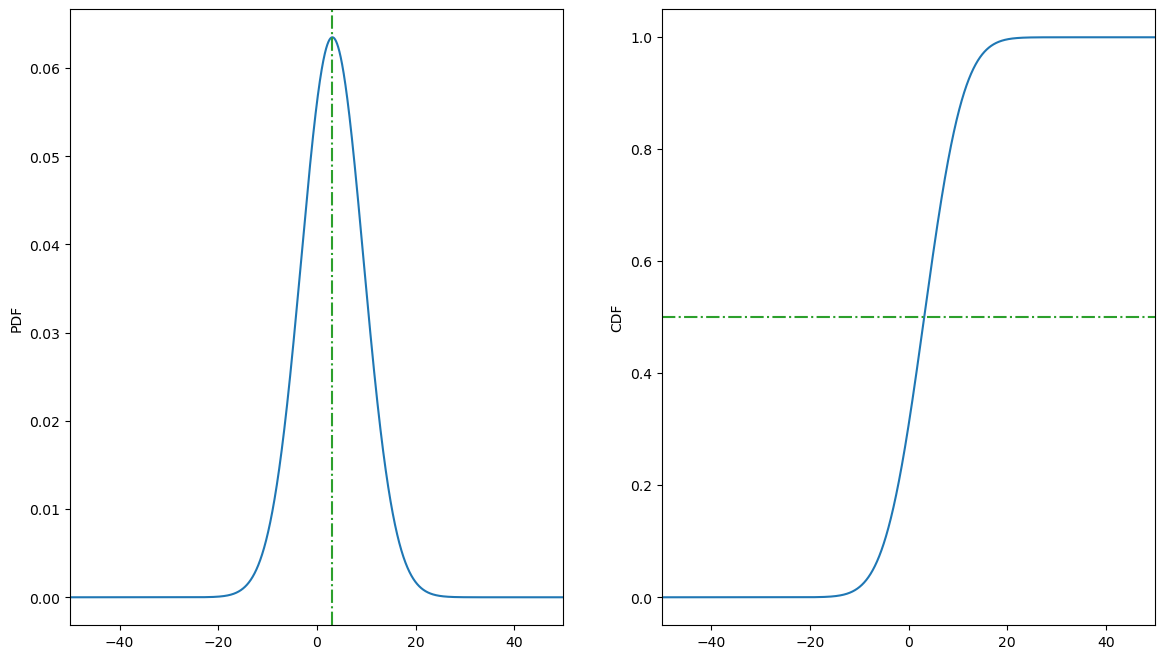

In [62]:
from scipy.stats import norm
import numpy as np

bins=np.arange(-50,50,0.01)
PDF=norm.pdf(bins,loc=np.pi,scale=2*np.pi) #generates PDF in bins
CDF=norm.cdf(bins,loc=np.pi,scale=2*np.pi) #generates CDF in bins



#Now we plot the results


fig, ax  = plt.subplots(1,2,figsize=(14,8))
ax[0].plot(bins,PDF)
ax[0].set_ylabel("PDF")
ax[0].axvline(np.pi,ls='-.',color='tab:green')
#ax[0].set_yscale('log')
ax[0].set_xlim(-50,50)
ax[1].plot(bins,CDF)
ax[1].axhline(0.5,ls='-.',color='tab:green')
ax[1].set_ylabel("CDF")
ax[1].set_xlim(-50,50)
#plt.show()

Which produces the above plot:


Here we notice that the peak of the PDF equals the mean value of $\pi$ (denoted by vertical green line) and the value of where CDF = 0.5 also equals $\pi$ (horizontal green line).


One common practice is to fit a dataset into a distribution. That is, we have some data and then say "let's fit it with a normal distribution" or "let's fit it with a gamma distribution", etc. 

This can be accessed through the ``fit`` function.  E.g. ``scipy.stats.norm.fit``.

To demonstrate this idea, we generate some pseudo data through the ``rvs`` function (``norm.rvs``) which generates random numbers that follow a given distribution.

Here's an example:

3.05380561546254 6.180320774007141


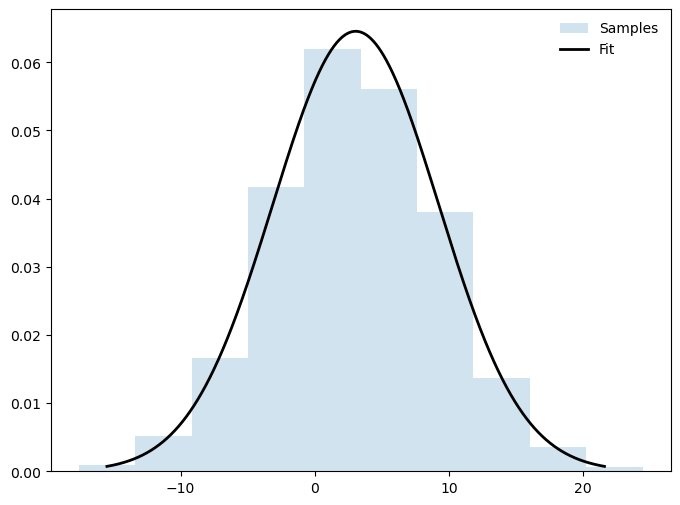

In [63]:
samples = norm.rvs(loc=np.pi, scale=2*np.pi, size=5000)  # random data set

mu, sigma = norm.fit(samples, method="MLE")  # do a maximum-likelihood fit
print(mu, sigma)

# Plot figure
bins = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.005)
plt.hist(samples, density=True, histtype='stepfilled',
         alpha=0.2, label='Samples')
plt.plot(bins, norm.pdf(bins, loc=mu, scale=sigma),
         'k-', lw=2, label='Fit')
plt.legend(loc='best', frameon=False)
#plt.show()

This particular iterations produces a fitted mean of 3.267 and standard deviation of 6.17, which are very close to a mean of $\pi$ and standard deviation of 2$\pi$.   Repeating this simulation will give slightly different answers each time (since we are selecting random numbers _drawn from_ some distribution but we should expect qualitatively the same answer.
 
![](./figures/Figure_15.png)


#### _Discrete Distributions_

_Discrete_ distributions describe the rate of occurances of discrete (countable) outcomes.  They contrast with continuous distributions, whcih can have outcomes that fall anywhere on a continuum.

SciPy contains several examples of discrete distributions, including ``bernoulli`` (Bernoulli distribution), ``binom`` (binomial distribution), ``poisson`` (Poisson distribution).   As with continous distributions, each call to a discrete distribution comes with some key functions, e.g. its PMF (probability mass function) and its CDF (cumulative distribution function).



**Binomial** 

A binomial distribution describes the number of successes in a series of $n$ independent draws, each with an outcome probability $p$ ("success" or "positive result") or probability $q$ ("failure" or "null result").    A single draw follows a Bernoulli distribution.  The binomial distribution provides the basis for the binomial statistical significance test.   

In any case, with a binomial distribution, the probability $p$ of $k$ "successful"/"positive result" outcomes given $n$ independent draws is:

$f(prob(k,n,p)) = \frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$

**Poisson**

The Poisson distribution is a simpler discrete distribution, measuring the probability of a given number of events happening in a specified time period.

It has a functional form of 

$f(prob(k,\lambda))$ = $\frac{\lambda^{k}e^{-\lambda}}{k!}$

In the simplest possible terms, you can think of a Poisson distribution as a binomial distribution the limit of an infinite number of draws and where the expected number of "successes" is constant with time.

**Bernoulli**

This is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 − p$.   It can be thought of as a binomial distribution where $n = 1$ (i.e. a single draw).

#### _Confidence Intervals_

In frequentist statistics (i.e. what we are dealing with), a confidence interval (CI) describes the likelhood that some measurement will fall within some range a certain fraction/percentage of the time.  

 E.g. you make some measurement x with value y.   What if you measure the same thing again but with a differetn sample? and again? and again?  The "95% confidence interval" then means "you will measure x to be y within [some range] 95% of the time".  The concept is intertwined with measurement uncertainties in physics and astronomy (e.g. the brightness of a star in a given passband), so you will hear this term thrown around a lot.  And there are deep misunderstandings about what these terms mean and even deeper confusion about how to calculate them in Python.   
 
 _Poisson statistics_ 
 
 For Poisson distribution statistics, the confidence intervals are symmetric about the mean, $p$ (k/n).  E.g. a 1-$\sigma$ (68%) interval has upper and lower ranges about the mean (measured) value of $1+q$ and $1-q$, where $q$ = $\sqrt{1/k + 1/n}$.   In other words:
 
 (upper bound) = p(1+q)
 
 (lower bound) = p(1-q)
 
 In the limit that $k$ is small compared to $n$, this further reduces to the symmetrical limits of $\sqrt{k}/n$.  So for example, if you detect 2 binary companions (or brown dwarfs or planets) around a sample of 10 stars, then your frequency assuming Poisson statistics is 0.200 with upper and lower bounds of 0.355 and 0.045.
 
 The limitations of Poisson statistics seems straightforward but in practice even professional researchers can ignore them.  For example, see this example where the author (Adam Burgasser, UCSD) lectures the field on using Poisson statistics for samples that are tens in size (!!!!), which is obviously from the above a no-go.
 
 [https://arxiv.org/pdf/astro-ph/0211470.pdf]()
 
 Since they are invalid, we have to use more appropriate statistics: binomial statistics.
 
  _Binomial statistics_ 
  
  
  And ... here's where things get complicated and documentation you may find gives wildly different impressions of the "right" approach (and where your instructor went down a _MASSIVE_ rabbit hole when writing these notes).
  
So if you have a probability distribution (i.e. a curve with some area) x fraction of that area will lie within two numbers.   Here's an example from the Burgasser et al paper I mentioned above:

![](./figures/burgasser_pdf.png)

The simple interpretation of, say, a 68% confidence interval is "shaded region about the mean comprising 68% of the total area".   And that would be exactly true in the case of a _flat prior_ (uniform prior) on the distribution.  The reality is that the exact confidence interval calculated in a binomial distribution is a non-trivial calculation.  In fact this widely-cited paper has a long, blunt discussion (er rant) about confidence intervals):
[https://core.ac.uk/download/pdf/132271468.pdf]()

The key is to know _what_ you are calculating and understand the limitations/assumptions.


 Here are your options and how to calculate them in SciPy:


* **Flat Prior** -- A flat (uniform) prior on the binomial proportion over the range 0 to 1.  The posterior density function is a Beta distribution: $\beta$(k + 1, n - k + 1).   In SciPy upper and lower bounds are computed by the inverse $\beta$ function, which is this horrendous-looking thing ...

![](./figures/inverse_beta.png)

The implementation SciPy is less horrendous ...

```
from scipy.special import betaincinv

alpha=1-confidence_interval #e.g. 0.68 for 68% CI

lowerbound = betaincinv(k + 1, n - k + 1, 0.5 * alpha)
upperbound = betaincinv(k + 1, n - k + 1, 1.0 - 0.5 * alpha)

```

Here, we can recover Burgasser's quoted confidence interval:

In [64]:
from scipy.special import betaincinv
k=2
n=10
confidence_interval=0.682 #exact val for 1-sigma CI
alpha=1-confidence_interval #e.g. 0.68 for 68% CI

lowerbound = betaincinv(k + 1, n - k + 1, 0.5 * alpha)
upperbound = betaincinv(k + 1, n - k + 1, 1.0 - 0.5 * alpha)

print(lowerbound)
#0.12845821647659547
print(upperbound)
#0.373010124833298

0.12845821647659555
0.37301012483329804


This understanding of a confidence interval is what I "grew up" with in pre-Python (IDL) days.

* **Jeffrys Interval** -- This interval is derived by applying Bayes’ theorem to the binomial distribution with the noninformative Jeffreys prior. The noninformative Jeffreys prior is the Beta distribution, Beta(1/2, 1/2), which has the density function.  The posterior density function is a Beta distribution: $\beta$(k + 1/2, n - k + 1/2). 

The general "expert" consensus is that the Jeffreys Prior is "better".

In [65]:

k=2
n=10
confidence_interval=0.682 #exact val for 1-sigma CI
alpha=1-confidence_interval #e.g. 0.682 for 68% CI

lowerbound = betaincinv(k + 1/2, n - k + 1/2, 0.5 * alpha)
upperbound = betaincinv(k + 1/2, n - k + 1/2, 1.0 - 0.5 * alpha)

print(lowerbound)
#0.10563168409670065
print(upperbound)
#0.350859220932479


0.10563168409670068
0.3508592209324789


As you see, the answers are _slightly_ different than a flat prior.

 
* **Wilson Interval** 

This interval, attributed to Wilson [2], is given by 
$CI_{\rm Wilson} = \frac{k + \kappa^2/2}{n + \kappa^2}
        \pm \frac{\kappa n^{1/2}}{n + \kappa^2}
        ((\hat{\epsilon}(1 - \hat{\epsilon}) + \kappa^2/(4n))^{1/2}$,
        

where $\hat{\epsilon} = k / n$ and $\kappa$ is the
    number of standard deviations corresponding to the desired
    confidence interval for a *normal* distribution (for example,
    1.0 for a confidence interval of 68.269%). For a
    confidence interval of 100(1 - $\alpha$)%, $\kappa = \Phi^{-1}(1-\alpha/2) = \sqrt{2}{\rm erf}^{-1}(1-\alpha)$.   
    
    
Now, this looks truly "involved".  Thankfully SciPy has decided to have a canned function especially for it, using the ``binomtest.proportion_ci`` function.   The call is pretty simple:

```from scipy.stats import binomtest``` 

then

 ``binomtest(k,n).proportion_ci(method='wilson',confidence_level=[confidence level]``
 
 E.g. for a 1-$\sigma$ confidence interval (68.2% or 0.682) for our example of $k=2$ and $n=10$
 
 

In [66]:

from scipy.stats import binomtest
#binomtest(2,10).proportion_ci(method='wilson',confidence_level=0.682)

#ConfidenceInterval(low=0.10372027242788966, high=0.3506840498201643)

#you can access the specific values by calling the "low" and "high" properties

result=binomtest(2,10).proportion_ci(method='wilson',confidence_level=0.682)
#result=binomtest(2,10).proportion_ci(method='wilson',confidence_level=0.954)
print(result.low)   
#0.10372027242788966
print(result.high)
#0.3506840498201643


0.10372027242788966
0.3506840498201643


This value gets _really_ close to a Jeffreys prior. 


* **exact** (aka Clopper-Pearson method)  - calling this an "exact" method may be a bit questionable (particularly to the authors of the paper listed above) but I include it for completeness since the function call is pretty straightforward (like Wilson except just a slightly different keyword)

In [67]:
from scipy.stats import binomtest
binomtest(2,10).proportion_ci(method='exact',confidence_level=0.682)
#Confidene Interval(low=0.07205052578034218, high=0.405232091711883)

ConfidenceInterval(low=0.07205052578034218, high=0.405232091711883)

So which to use?   Depends.  The Wilson and Jeffreys prior are recommended by that paper.   My advice (which is true for code in general): just understand clearly which method you are using and clearly communicate that to others.

### Statistical Tests of Data

#### Chi-Squared Test and Goodness of Fit



**Warning/Note** -- In preparing this section, I discovered that SciPy's presentation is a bit "wonky" (to be very charitable).  So we will proceed in full-on, first-principles "Numerical Recipes" style.

With that said ...
 
When comparing data and models we are typically
doing one of two things:

• _Hypothesis testing_ : we have a set of $N$ measurements with individual measurements $i$.  These measurements have values $x_{i}$ and uncertainties $\sigma_{i}$.  We compare the data to some model, which says that these measurements should have values $\mu_{i}$.   

How probable is it that these measurements would have been obtained, if the model is correct?

• _Parameter estimation_ : we have a parameterized model
which describes the data, such as $y = mx + b$, and we
want to determine the best-fitting parameters and
errors (er, confidence intervals) in those parameters.


_Chi-Squared_

The chi-squared statistic ($\chi^{2}$) is first stop to an answer.  It is a quantitative measure of the goodness-of-fit of the data to the model.  In its simple form -- assuming that the measurments and their errors are independent (more on this later) -- of the following:

$\chi^{2}$ = $\sum_{i=1}^{N}$$\frac{(x_{i}-\mu_{i})^{2}}{\sigma^{2}}$.

Note that this is a different thing than the Pearson chi-square statistic which is $\sum_{i=1}^{N}$$\frac{(x_{i}-\mu_{i})^{2}}{\mu_{i}^{2}}$, which does not consider measurement error (and isn't useful in our context).  

Anyway, the chi-squared statistic ($\chi^{2}$) penalizes the model according to how many standard deviations each data point lies from the model.  E.g. if the measurement $i$ is $x_{i}$ = 2 and $\sigma_{i}$ = 0.5 (so the measurement is 2$\pm$ 0.5) and the model predicts 3, then this is a 2-$\sigma$-discrepant prediction for $i$ and the $\chi^{2}$ contribution from that data point is equal to 4. 

For Gaussian-distributed variables, the chi-squared statistic has a probability distribution function (PDF) of 
$P(\chi^{2})$ $\propto$ ($\chi^{2}$)$^{(\nu -2)/ 2} e^{-\chi^{2}/2}$. 

The full form looks slightly more involved:

$P(\chi^{2})$ = $(2^{\nu/2}\Gamma(\nu/2))^{-1}$($\chi^{2}$)$^{(\nu -2)/ 2} e^{-\chi^{2}/2}$

Here, $\nu$ equals "degrees of freedom".  $\Gamma$ is the gamma function which is accessed by ``from scipy.special import gamma`` with the call ``gamma([number])``.

The other, simpler way of calculating the $\chi^{2}$ PDF is a SciPy function call ``scipy.stats.chi2``, using the ``pdf`` function:

```
from scipy.stats import chi2

#initialize some range of chisquared values
chisqval=np.arange(0,1000,0.01) 

#dof 
chispdf=chi2.pdf(chisqval,dof)
```

 If the model has no free parameters then $\nu$ = $N$.   But if we are fitting a model with $p$ free parameters, then we can
“force the model to exactly agree with p data points”, and so $\nu = N - p$.  Note we almost always have at least one free parameter when we do model fitting.

  ![](./figures/chisquaredist.png)

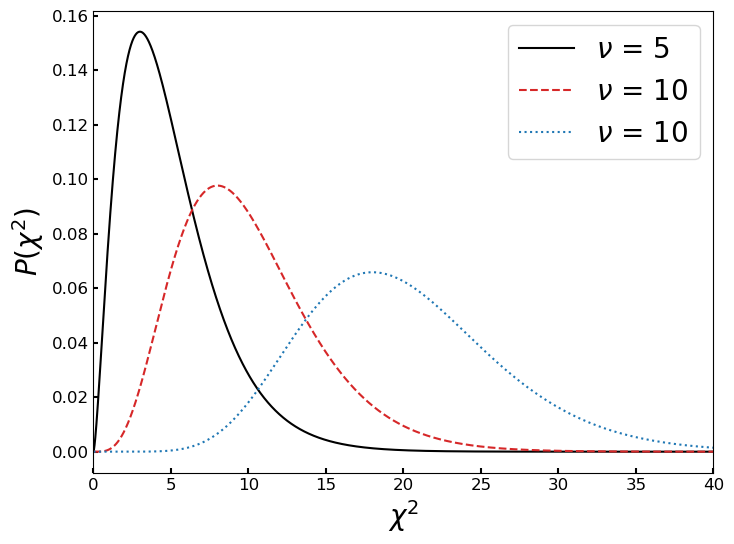

In [76]:
from scipy.stats import chi2

chisqval=np.arange(0,1000,0.01)

dofrange=[5,10,20]

import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(8,6))

axes.plot(chisqval,chi2.pdf(chisqval,dofrange[0]),c='black',linestyle='solid',label='$\\nu $ = {0}'.format(dofrange[0]))
axes.plot(chisqval,chi2.pdf(chisqval,dofrange[1]),c='tab:red',linestyle='--',label='$\\nu $ = {0}'.format(dofrange[1]))
axes.plot(chisqval,chi2.pdf(chisqval,dofrange[2]),c='tab:blue',linestyle='dotted',label='$\\nu $ = {0}'.format(dofrange[1]))
axes.set_xlim(0,40)
axes.tick_params(which='both',width=1.5,direction='in',labelsize='large')
axes.set_ylabel(r'$P(\chi^{2})$',size=20)
axes.set_xlabel(r'$\chi^{2}$',size=20)
axes.legend(fontsize=20)
plt.show()

In each case, the mean of the distribution is related to the number of degrees of freedom ... and by related I mean equal: $\bar{\chi^{2}}$ = $\nu$ = $N-p$.   The variance is also related: $Var{(\chi^{2})}$ = 2$\nu $.   

Thus, if the model is correct and if our measurement errors are accurate (i.e. they are not underestimated or inflated), we would expect:

$\chi^{2}$ $\sim$ $\nu$ $\pm$ $\sqrt{2\nu}$ 

One can understand this intuitively.  Each data point should contribute about $\sim$1-$\sigma$ from the model and hence $\sim$ 1 to the $\chi^{2}$ statistic.

_reduced chi-squared_

A perhaps more useful way to describe the goodness-of-fit is the _reduced_ chi-squared, which is $\chi^{2}/\nu$.   I.e. the $\chi^{2}$ per degree of freedom.   For a good fit --and again assumes our errors are accurate -- we expect $\chi^{2}/\nu$ because $\bar{\chi^{2}} = \nu$.   

 However the true likelihood of the data being consistent with the model depends on both $\chi^{2}$ and $\nu$.   In other words, our interpretation of what $\chi^{2}/\nu$ means depends on the number of degrees of freedom $\nu $.  We will get to this idea below when we discuss p-values.
 





_Correlated Errors_

So far, our $\chi^{2}$ equation assumes that each measurement and the errors associated with them are independent.   To understand what this means, consider a matrix where each element at column $i$ and row $j$ corresponds to a pair of measurement errors.   For truly independent errors, the off-diagonal elements are zero, while the diagonal elements are equal to the variance of each measurement of the data ($\sigma^{2}$).  

But sometimes the errors are coupled and the measurement values are correlated. The attached image shows an example (from Greco & Brandt 2017):

![](./figures/speccovar.png)

Here, the green circle shows the hypothetical position of a planet.   The signal shows speckle pattern.    In high-contrast imaging data taken with an integral field spectrograph (think "images at a bunch of different wavelengths all at once"), the speckle pattern appears to propagate outwards with wavelength.   If you would measure the brightness of the planet at, say, 1.65 $\mu m$, its signal would be affected by the speckle (orange-yellow stuff).  Measurements at 1.575 $\mu m$ and 1.725 $\mu m$ would likewise be affected.   Therefore, our measurements of the planet flux density in each of these three channels are coupled (i.e. they are dependent upon the modeling/removal of the signal of the same speckle viewed at different wavelengths).

For correlated errors, the $\chi^{2}$ equation is a bit more complicated:

$\chi^{2} = \sum_{i=1}^{N}\sum_{j=1}^{N} (x_{i}-\mu_{i})(C^{-1})_{ij} (x_{j}-\mu_{j})$

In vector-matrix notation this ends up being ...

$\chi^{2}$ = ($\textbf{x}$-$\mu$)$^{T}$ $\textbf{C}^{-1}$ ($\textbf{x}$-$\mu$)

Here, $\textbf{C}$ is the covariance matrix.   As an example, for two measurments, the covariance matrix matrix looks like:

$\textbf{C}$ = $\left[ {\begin{array}{cc}
   \sigma_{1}^{2} & \sigma_{1}.\sigma_{2} \\
   \sigma_{2}.\sigma_{1} & \sigma_{2}^{2}\\
  \end{array} } \right]$ 


If the measurements $1$ and $2$ and their uncertainties are truly uncorrelated, then the off-diagonal terms go to zero and we recover the familiar equation describing the goodness-of-fit.   Otherwise, if they are correlated (as in the above example), then we need to consider the full covariance of the data.

_p-values_

If the model is correct [our hypothesis], what is the probability that this value of
chi-squared, or a larger one, could arise by chance?  This probability is called the p-value and may be
calculated from the chi-squared distribution.  

To understand how this works, we first calculate the _cumulative distribution function_ (CDF) of our $\chi^{2}$ distribution.  This is accessed from ``chi2.cdf`` from ``scipy.stats``:

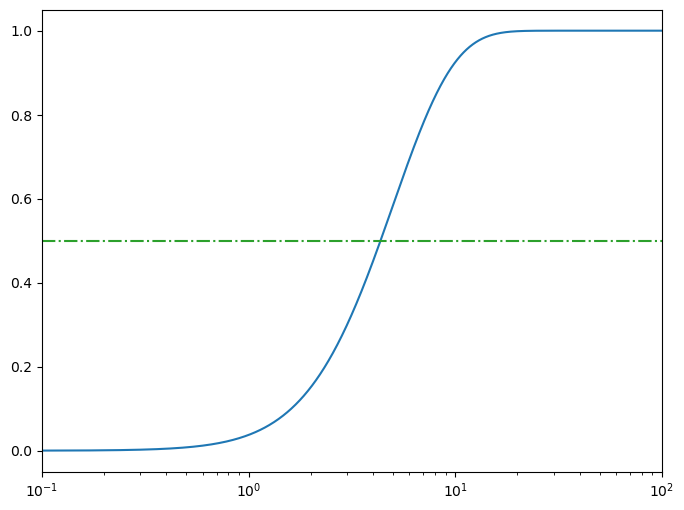

In [70]:

#array of chisq values

chisqval=np.arange(0,1000,0.01)

#choose some number of degrees of freedom

dof=5

cdf=chi2.cdf(chisqval,dof)

plt.plot(chisqval,cdf)
plt.xlim(0.1,100)
plt.axhline(0.5,ls='-.',color='tab:green')
plt.xscale('log')

In the below example I plot the cumulative distribution function for a chi-squared distribution with 5, 10, and 20 degrees of freedom (i.e. as in the previous figure).

As before, don't worry about all the Matplotlib trickery for now.  We will cover it later.

Text(0, 0.5, '$CDF(\\chi^{2})$')

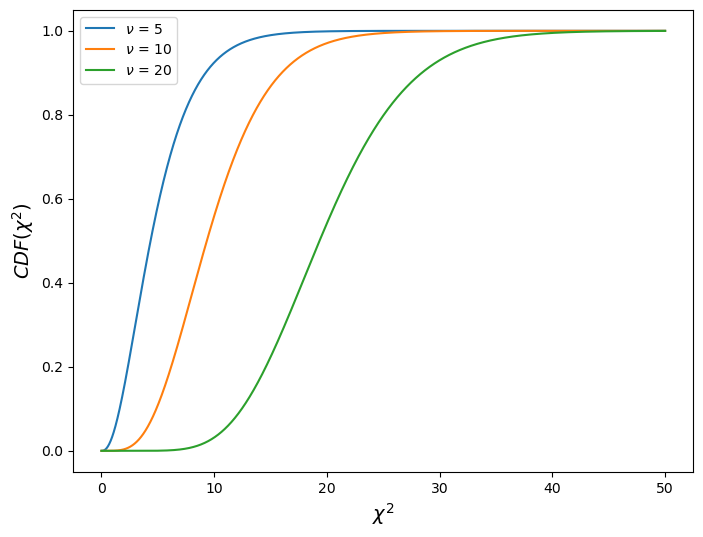

In [72]:

#import matplotlib.pyplot as plt

#list of degrees of freedom
dof=[5,10,20]

chisq=np.arange(0,50,0.01) #a subset of values

#a for-loop plotting the CDF for different degrees of freedom
for i in range(len(dof)):
 plt.plot(chisq,chi2.cdf(chisq,dof[i]),label=r'$\nu$ = {0:d}'.format(dof[i]))
 
#making the plot look nicer
plt.legend(loc='best')
plt.xlabel(r'$\chi^{2}$',fontsize=14)
plt.ylabel(r'$CDF(\chi^{2})$',fontsize=14)




Compare this plot with the $\chi^{2}$ plot.   In this one, you see that the CDF for $\nu = 5$ flattens out to almost horizontal (CDF $\sim$ 1) at $\chi^{2}$ = 10.  For $\nu = 10$, this happens at a larger value of $\chi^{2}$ = 20.

If we take 1-the CDF we get the _**p-value**_ for this particular $\chi^{2}$ distribution:

Text(0, 0.5, '$p value(\\chi^{2})$')

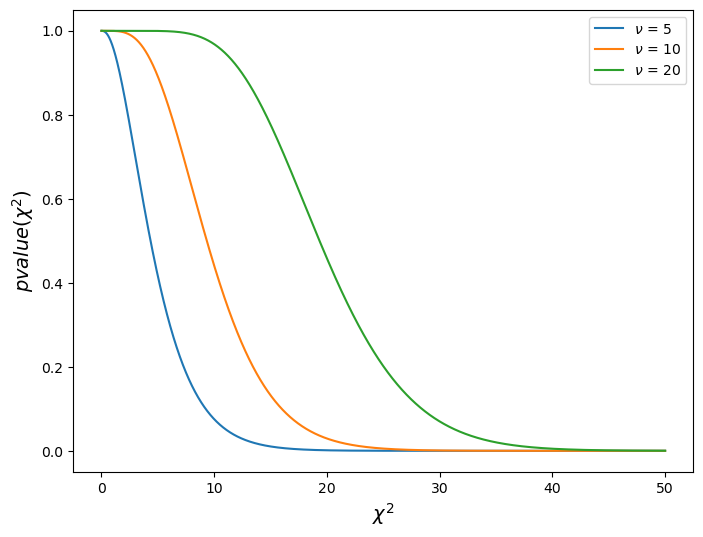

In [77]:

#import matplotlib.pyplot as plt

#list of degrees of freedom
dof=[5,10,20]

#a for-loop plotting the CDF for different degrees of freedom
for i in range(len(dof)):
 plt.plot(chisq,1-chi2.cdf(chisq,dof[i]),label=r'$\nu$ = {0:d}'.format(dof[i]))
 
#making the plot look nicer
plt.legend(loc='best')
plt.xlabel(r'$\chi^{2}$',fontsize=14)
plt.ylabel(r'$p value(\chi^{2})$',fontsize=14)



At $\chi^{2}$=10, the $\nu = 5$ curve is again nearly horizontal near a tiny p-value.  The same thing happens for curves corresponding to larger degrees of freedom but at larger $\chi^{2}$ values.

_The meaning of p-values, [something]-$\sigma$, Probability of a False Detection, and "p-hacking"_

Okay, then how do we interpret the results? First, let's consider the case if we are trying to compare a data to some model.  The actual measurement can lie above or below the model prediction. To start with, we need to define the limits we are interested in.  

Oftentimes, you will hear someone say "this is ruled out at the 5-$\sigma$ level" or "this is a 3-$\sigma$ detection", etc.   Quantitatively, what are those numbers?  Well, if we are dealing with Gaussian statistics, we can simply integrate the functional form for a normal distribution and get an answer.

x-limit(x) = $\int_{-x}^{x} \frac{1}{\sigma\sqrt{2\pi}}e^{-0.5((x-\mu)/\sigma)^{2}} \,dx $

We can solve this numerically using SciPy's integration subpackage.  An example is ``def nsigmalim`` in the ``pdfcdf.py`` script, which we repeat here.

In [78]:

def nsigmalim(nsig=3):
 import scipy.integrate as integrate

 result=integrate.quad(lambda x: np.e**(-0.5*x**2)/np.sqrt(2*np.pi),-nsig,nsig)

 return result[0]


result=nsigmalim(nsig=5)
print(result)
print(1-result)

0.9999994266968565
5.733031435140035e-07


For example, if we do ``from pdfcdf import nsigmalim; nsigmalim(nsig=5)`` we are asking the program to tell us how much of the distribution lies within $\pm$ 5-$\sigma$ limits.   We get ``0.9999994266968565``.  If we take, 1 minus this value, we see how much lies outside these limits: ``5.733031435140035e-07``.  At 1, 2, and 3-$\sigma$ limits we get 0.6826, 0.9544, and 0.9973 lying within and 0.317, 0.0455, and 0.0027 lying outside.
 

So what limit are we interested in?  E.g. are we interested in agreement between the model and the data at the 68.2% confidence limit (Gaussian 1-$\sigma$), 95.45% (2 $\sigma$), 99.73% (3-$\sigma$), etc.?    At 3-$\sigma$, we then expect a matching model to be an outlier only 0.27% of the time.   Compare [1-this limit] to our p-value (e.g. approximately 0.05 for 2-$\sigma$, 0.0027 for 3-$\sigma$).

If the p-value is not low compared to our adopted limit, then the data are consistent
with being drawn from the model.  If the p-value is low, then this model (if correct) would such a p-value from chance very few times: it is likely that the data are not consistent
with being drawn from the model. 


Second, let's consider a case where we are trying to see if some purported physical signal is a fluke (i.e. it is a chance noise fluctuation).   Here, we are only interested in a detection.  Thus, we expect a single true 3-$\sigma$ detection to be a fluke 0.135% of the time (1.35$\times 10^{-3}$).   At 5-$\sigma$, this is a tiny 0.5$\times$5.733$\times 10^{-7}$ = 2.867$\times$10$^{-7}$.   This concept (a false detection; interpreting noise as a true signal) is related to the terms "False Alarm Probability" or "False Positive Fraction".


**WARNING #1** A certain _p-value_ larger than an adopted limit does NOT prove that a given model is the correct one.  Just that IF the model were correct (again IF) at the xxx limit, it would have a p-value larger than some other value.

**WARNING #2**  A very low probablity of a false detection does NOT necessarily mean that we are in the clear.   What we can really say is that we expect this signal xx % of the time if a true astrophysical signal does not exist.  But rejecting a correct model 5% of the time will erroneously reject a correct model 5% of the time; a 1% probability that a detection is noise will still be noise 1% of the time.   

Here's a case of the danger in case #2 [sorry, this is another exoplanet imaging example] ...

  Let's say you have some signal in our data that appears brighter than the rest.   In fact, if you compute the signal compared to the standard deviation of other regions you find that it is a 3-$\sigma$ significant detection.   So you would naively think that there is a 0.135% chance that this detection is faulty.  That's a super-low probability.   All done, right?  

No.  Because this signal is on some detector with some area.   The real question you want to answer is "_what are the chances that there is a false detection **somewhere** on this image_"?   To answer that, you need to take the total area of your detector and divide by the area of a planet signal (jargon jargon "the PSF core size") and multiply this number by the probability of a single 3-$\sigma$ detection.

A worked example:

* camera = 200 pixels by 200 pixels; pixel scale of 0.01"/pixel
* 8 meter telescope at 1.6 microns

* So ... the PSF core size is about $FWHM = 1.028x0.206\lambda/D$ = 0.042" or 4.23 pixels.   The area of a PSF core is then $\pi (FWHM/2)^{2}$ or 14.1 pixels$^{2}$ in area.  The detector area is 200 by 200 = 40,000 pixels$^{2}$ so we have 40,000/14.1 = 2837 independent PSF-sized regions.   

Multiply this number of independent regions by the p-value of a 3-$\sigma$ detection and you find that you should get about four 3-$\sigma$ peaks on your detector purely by chance!   So the fact that you have at least _one_ 3-$\sigma$ peak is completely expected!

The flaw in reasoning thinking that you have identified a planet in the above case is similar to the concept of "p-hacking".  Basically, you have a huge data set what could possibly be correlated with the data?  Well, if you search long and hard enough you are bound to find _something_ that is correlated with your data at some confidence level.   And if you have a large enough detector, you are bound to find some 3-$\sigma$ noise blip _somewhere_.

_$\Delta \chi^{2}$ and Parameter Estimation_ 

We have a large number of models to which we are comparing to data.  The model have some different variations of input parameters.   One example I deal with regularly: planet atmosphere models with some certain prescription for clouds and then some range in other properties like temperature (say, 500 K to 2000 K), gravity (say log(g) = 3 to 5), and metallicity (say [M/H] = -1 to 1).

We now have two follow-up questions: 1) how would we describe the family of "best-fitting solutions", 2) how would we describe the confidence region for parameters from these models?   

The answer lies in the $\Delta \chi^{2}$ values.   Here, 

$\chi^{2}$ = $\chi^{2}_{min}$ + $\Delta \chi^{2}$.   I.e. we have some value that is our best-fitting model, which we call $\chi^{2}_{min}$ (because it has the minimum $\chi^{2}$ value).   The family of best-fitting models is defined _relative_ to this minimum, i.e by the $\Delta \chi^{2}$ value.

Parameter estimation is conceptually simpler and leverages specifically on $\Delta \chi^{2}$.   To perform this, we define contours of constant   $\chi^{2}$ = $\chi^{2}_{min}$ + $\Delta \chi^{2}$.   If we are wanting a joint confidence region for two parameters (say, temperature and gravity from my example) then we compute the regions where:

 $\chi^{2}$ - $\chi^{2}_{min}$ $<$ $\Delta \chi^{2}$
 
 Fine, but what _is_ $\Delta \chi^{2}$?   The $\Delta \chi^{2}$ values dependt on the number of variables in our joint estimation and confidence limits.  E.g. for a two-variable joint estimation:
 
   The 68.2% (1-$\sigma$) confidence limit is $\Delta \chi^{2}$ $\le$ 2.30
   
   The 95.45% (2-$\sigma$) confidence is $\Delta \chi^{2}$ $\le$ 6.17
   
   The 99.73% (3-$\sigma$) confidence limit is $\Delta \chi^{2}$ $\le$ 11.8
   
   An example of this trend is from some analysis below of the HIP 99770 b planet, where we compared its data to models spanning a range of temperatures and gravities (for a given set of fixed other atmospheric properties).
   
  
![](./figures/Figure_19.png)


#### Student's t-distribution and t-test

The t-statistic was introduced in 1908 by William
S. Gosset, a chemist working for the Guinness brewery. He was concerned about
comparing different batches of the stout, in particular when there were only a small number of batches to work with (Guiness was a smaller operation 100+ years ago).

 He developed
the t-test, and the t-distribution for that purpose. According to legend, Guiness forbade him from publishing his results (because others would steal it and rob Guiness of its competitive advantage?), so Gosset anonymously published his mathematical work under
the pseudonym “Student”.  Hence the term "Student's t-test" and "t-distribution".

The key difference between the t-distribution and a normal distribution is as follows.  With a normal distribution, we assume that we have perfect knowledge of the population standard deviation and we have a ton of samples.   With a t-distribution, we do not make these assumptions: the t-distribution adjusts for our lower confidence in our ability to estimate the true underlying distribution when we have small sample sizes.  And quite often in astrophysics, we encounter the case where we only have a small number of samples.  

The functional form of the t-distribution looks as follows:

 
$f(x)$ = $\frac{\Gamma(\frac{\nu+1}{2})}{\Gamma(0.5\nu)\sqrt{\nu\pi}}(1 + x^{2}/\nu)^{-\frac{\nu+1}{2}}$

Gamma functions all over the place.  Practically speaking, how does it differ?  To demo that, you can run ``def tdist`` from ``pdfcdf.py``.

Here, I will illustrate the behavior of the t distribution as we go from a small number of degrees of freedom to a very large number:

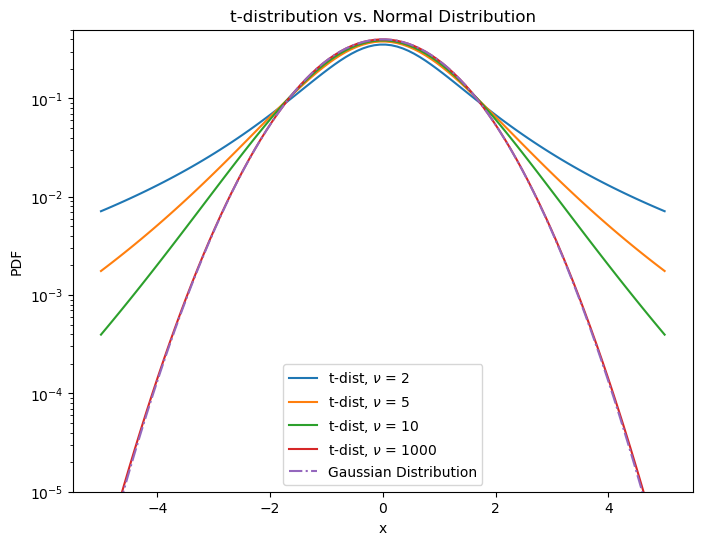

In [79]:

def tdist():
 from scipy.stats import t
 from scipy.stats import norm


#t distribution PDF


 x=np.linspace(-5,5,100)

 dof=[2,5,10,1000]

#to apply some other normalization
 maxt=1;maxnorm=1

 for i in range(len(dof)):

   plt.plot(x,t.pdf(x,dof[i])/maxt,label=r't-dist, $\nu$ = {0:d}'.format(dof[i]))


#Now, plotting a Gaussian distribution
 plt.plot(x,norm.pdf(x)/maxnorm,ls='-.',label='Gaussian Distribution')

 plt.xlabel('x')
 plt.ylabel('PDF')
 plt.yscale('log')
 plt.title('t-distribution vs. Normal Distribution')

 plt.legend(loc='best')

 plt.ylim(1e-5,0.5)
 #plt.show()

tdist()


The t-distribution has a slightly flatter peak and much fatter tails of its distribution than does a normal distribution.

_Applications_

There are a lot of applications of t-distributions and t-tests in scientific research.   My personal favorite is again with exoplanet imaging.   Remember that quoted 3-$\sigma$ "detection" of a planet mentioned before?   You saw how you might expect many more spurious detections if you consider all possible realizations of the noise over the size of your detector.  The situation is actually worse, if you realize the implications of the t-distribution.

Namely, the usual approach to computing the noise in exoplanet imaging data is to compare the signal within one region (typically a PSF core size) to that of other similarly sized regions at the same separation from the star (because the noise is primarily a function of radial separation ...[yada, yada ignore tech details]".  So you compute the noise and get some estimate for the standard deviation.   You use this information to compute the noise as a function of r to compute some contrast limit (i.e. a limit on how bright a planet you can detect relative to the brightness of the star).   Or you compare that to the other PSF-sized region where you think there is a planet.  

But here's the problem, the number of independent samples from which you are estimating the noise is not very large: maybe tens or so?   And in fact it is smaller the closer you get to the star, as illustrated in this image from Mawet et al. (2014):


![](./figures/mawet.png)

So, if you are at a separation of 1 $\lambda$/D from the star, you only have 2$\pi$ $\sim$ 6 independent samples from which to estimate the noise.  So your number of degrees of freedom is going to be tiny.

Using SciPy, we can compute the impact of small sample statistics.  The specifics are beyond the scope of this course (if you are really interested, here's the paper [https://iopscience.iop.org/article/10.1088/0004-637X/792/2/97/pdf]().  1) you have to account for an extra factor of $\sqrt{1 + 1/n}$ where $n$ is the number of samples. 2) you are actually doing a two-sample t-test, determining whether the one sample (i.e. where your candidate planet is) is different form the others (the other regions of the image that define the noise).   So the number of degrees of freedom is 2$\pi$r-2 (r is in $\lambda$/D units).

In [80]:

def tpenalty(sep=2,sigma=5,source=True):


 from scipy.stats import t
 from scipy.stats import norm


 res_el=2*np.pi*sep

#note: some slight disagreement between ...
# the text of the paper, 
#code implementations 
#and Table 1/Figure 6: 

#res_el=np.floor(res_el) #res_el = np.round(res_el) 
 
#My code will recover Table 1/Figure 6 values, which you can recover if you do not adjust res_el


#Table 1/Figure 6 entries
 if source:

  ss_corr=np.sqrt(1+1/(res_el))
  penalty = t.ppf(norm.cdf(sigma),res_el-2)*ss_corr/sigma


#if we are doing a contrast curve, instead of evaluating a possible planet detection
# then we gain a DOF

 else:

  ss_corr=np.sqrt(1+1/res_el)
  penalty = t.ppf(norm.cdf(sigma),res_el-1)*ss_corr/sigma

 print('penalty is ',penalty)
 return penalty


tpenalty()

penalty is  2.206523175207393


2.206523175207393

As you can see, the correction factor can be substantial: a factor of 10 at 1 $\lambda$/D and 2.2 at 2 $\lambda$/D for a 5-$\sigma$ threshold.


---

There are many more possible applications we can consider of the t-test, other statistics mentioned above, and other statistic test implementations in Python (e.g. the Kolmogorov-Smirnov test, Shapiro-Wilk Test, Spearman's Rank Correlation, etc.).  But we will stop here and move on to the next section of the course.